# Liners age

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import re
from dateutil.parser import parse
import string
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set_style("darkgrid")

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# read
tags=pd.read_excel("../../data/meta data/tags relevantes.xlsx")
tags_cc=tags.tag.to_list()
dic={}
for i,j in zip(tags.tag,tags.description):
    dic[i]=j

### 2. Data Loading

In [4]:
# Se lee csv
df=pd.read_csv('../../data/consolidated data/cleaned_15December2022.csv', parse_dates=['Timestamp'], index_col='Timestamp')
df.sort_index(inplace=True)
df.rename(columns=dic,inplace=True)
df.head()

,sag mill expert system,Limitado por Límite Alto de Tonelaje,Optimizando tonelaje,Limitado por Peso,Limitado por Corriente Bobina,Limitado por torque espesador 2,Limitado por torque espesador 3,Limitado por Potencia Bolas 1,Limitado por Potencia Bolas 2,Limitado por Pebbles,Limitado por Corriente harnero,Limitado por Potencia SAG,Limitado por limite bajo de tonelaje,Limitado por Temperatura bobina,Limitado por presión espesador 2,Limitado por presión espesador 3,pyrite law,chalcopyrite law,chalcocite law,covelin law,crusher index,sag power index,ball work index,bornite law,torque,charge cell,power,TPH,solid percentage,water,speed,solid,LL charge cell,HH charge cell,HH TPH,stator current,granulometry
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.499208,864.295848,23071.203516,3847.009774,65.090716,2063.724810,9.063008,65.0,820.0,900.0,4350.0,3935.520368,NaN
2018-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.410009,862.125504,23043.030173,3872.996001,65.171210,2072.257994,9.062102,65.0,820.0,900.0,4350.0,3930.839200,NaN
2018-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.261466,859.956386,22991.287211,3879.211149,65.122192,2079.820066,9.062520,65.0,820.0,900.0,4350.0,3923.503230,NaN
2018-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.115891,858.914758,22943.243462,3894.792946,65.085609,2089.536865,9.062208,65.0,820.0,900.0,4350.0,3914.689267,62.811786
2018-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.054172,857.932221,22921.665087,3959.416847,65.271563,2110.715057,9.062822,65.0,820.0,900.0,4350.0,3910.292390,62.749109


In [5]:
campañas=pd.read_csv("../../data/meta data/campaign_17December2022.csv")
campañas["Fechas"]=campañas["Fechas"]+' 00:00:00'
campañas.Fechas=pd.to_datetime(campañas.Fechas)
campañas

,anio,mes,dia,Fechas,CC referencial
0,2018,4,28,2018-04-28,775
1,2018,10,28,2018-10-28,775
2,2019,4,16,2019-04-16,775
3,2019,10,11,2019-10-11,775
4,2020,5,3,2020-05-03,775
5,2021,1,16,2021-01-16,775
6,2021,7,11,2021-07-11,775
7,2022,1,27,2022-01-27,775


# Generación de edades historicas

In [6]:
# Timestamp 1 min
date_format = "%Y-%m-%d %H:%M:%S"

start = datetime.strptime("2018-01-01 00:00:00", date_format )
end = datetime.strptime("2022-09-15 23:59:00", date_format )
timestep = 1
time_freq = str(timestep) + 'min'
timestamps = pd.DataFrame(pd.date_range(start, end, freq=time_freq))

timestamps.rename(columns={0:"Timestamp"},
               inplace=True)

In [7]:
edades=pd.DataFrame()
edades["Timestamp"]=timestamps
edades.head()

,Timestamp
0,2018-01-01 00:00:00
1,2018-01-01 00:01:00
2,2018-01-01 00:02:00
3,2018-01-01 00:03:00
4,2018-01-01 00:04:00


In [8]:
# Campañas historicas a lista
inicios_campañas=campañas["Fechas"].tolist()
inicios_campañas

[Timestamp('2018-04-28 00:00:00'),
 Timestamp('2018-10-28 00:00:00'),
 Timestamp('2019-04-16 00:00:00'),
 Timestamp('2019-10-11 00:00:00'),
 Timestamp('2020-05-03 00:00:00'),
 Timestamp('2021-01-16 00:00:00'),
 Timestamp('2021-07-11 00:00:00'),
 Timestamp('2022-01-27 00:00:00')]

In [9]:
# Se agrega el inicio  y fin de la data (Debe ser datetime.now() cuando se lleve a producción)
inicio=parse('2018-01-01 00:00:00')
fin=max(df['charge cell'][~df['charge cell'].isnull()].index)
inicios_campañas.insert(0, inicio)
inicios_campañas.append(fin)
inicios_campañas

[datetime.datetime(2018, 1, 1, 0, 0),
 Timestamp('2018-04-28 00:00:00'),
 Timestamp('2018-10-28 00:00:00'),
 Timestamp('2019-04-16 00:00:00'),
 Timestamp('2019-10-11 00:00:00'),
 Timestamp('2020-05-03 00:00:00'),
 Timestamp('2021-01-16 00:00:00'),
 Timestamp('2021-07-11 00:00:00'),
 Timestamp('2022-01-27 00:00:00'),
 Timestamp('2022-05-02 01:59:00')]

In [10]:
for i in range(len(inicios_campañas)-1):
    print(inicios_campañas[i],inicios_campañas[i+1])

2018-01-01 00:00:00 2018-04-28 00:00:00
2018-04-28 00:00:00 2018-10-28 00:00:00
2018-10-28 00:00:00 2019-04-16 00:00:00
2019-04-16 00:00:00 2019-10-11 00:00:00
2019-10-11 00:00:00 2020-05-03 00:00:00
2020-05-03 00:00:00 2021-01-16 00:00:00
2021-01-16 00:00:00 2021-07-11 00:00:00
2021-07-11 00:00:00 2022-01-27 00:00:00
2022-01-27 00:00:00 2022-05-02 01:59:00


In [11]:
# Clasificación de df del molino en el periodo definido
df["age tph processed"]=""
for i in range(len(inicios_campañas)-1):
    #print(inicios_campañas[i],inicios_campañas[i+1])
    mascara_campañas=(df.index >= inicios_campañas[i]) & (df.index < inicios_campañas[i+1])

    df["age tph processed"][mascara_campañas]=df["TPH"][mascara_campañas].cumsum(skipna=True)


df["age tph processed"]=df["age tph processed"].astype(str)
df["age tph processed"]=pd.to_numeric(df["age tph processed"], errors='coerce')
df.head() 

,sag mill expert system,Limitado por Límite Alto de Tonelaje,Optimizando tonelaje,Limitado por Peso,Limitado por Corriente Bobina,Limitado por torque espesador 2,Limitado por torque espesador 3,Limitado por Potencia Bolas 1,Limitado por Potencia Bolas 2,Limitado por Pebbles,Limitado por Corriente harnero,Limitado por Potencia SAG,Limitado por limite bajo de tonelaje,Limitado por Temperatura bobina,Limitado por presión espesador 2,Limitado por presión espesador 3,pyrite law,chalcopyrite law,chalcocite law,covelin law,crusher index,sag power index,ball work index,bornite law,torque,charge cell,power,TPH,solid percentage,water,speed,solid,LL charge cell,HH charge cell,HH TPH,stator current,granulometry,age tph processed
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.499208,864.295848,23071.203516,3847.009774,65.090716,2063.724810,9.063008,65.0,820.0,900.0,4350.0,3935.520368,NaN,3847.009774
2018-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.410009,862.125504,23043.030173,3872.996001,65.171210,2072.257994,9.062102,65.0,820.0,900.0,4350.0,3930.839200,NaN,7720.005775
2018-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.261466,859.956386,22991.287211,3879.211149,65.122192,2079.820066,9.062520,65.0,820.0,900.0,4350.0,3923.503230,NaN,11599.216924
2018-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.115891,858.914758,22943.243462,3894.792946,65.085609,2089.536865,9.062208,65.0,820.0,900.0,4350.0,3914.689267,62.811786,15494.009869
2018-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.054172,857.932221,22921.665087,3959.416847,65.271563,2110.715057,9.062822,65.0,820.0,900.0,4350.0,3910.292390,62.749109,19453.426716


In [22]:
df.set_index("Timestamp",inplace=True)

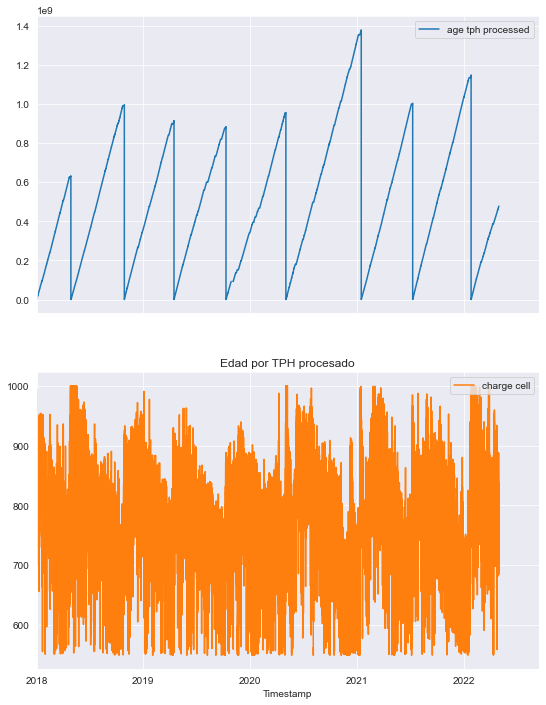

In [23]:
df[["age tph processed","charge cell"]].plot(subplots=True,figsize=(9,12))
plt.title("Edad por TPH procesado")
plt.show()

In [25]:
df.reset_index(inplace=True)

In [26]:
df[["Timestamp","age tph processed"]]

,Timestamp,age tph processed
0,2018-01-01 00:00:00,3847.009774
1,2018-01-01 00:01:00,7720.005775
2,2018-01-01 00:02:00,11599.216924
3,2018-01-01 00:03:00,15494.009869
4,2018-01-01 00:04:00,19453.426716
...,...,...
2475475,2022-09-16 01:55:00,NaN
2475476,2022-09-16 01:56:00,NaN
2475477,2022-09-16 01:57:00,NaN
2475478,2022-09-16 01:58:00,NaN


In [27]:
# Generación edades historicas
df[["Timestamp","age tph processed"]].to_csv('../../data/consolidated data/liners_age_'+pd.to_datetime('today').strftime('%d%B%Y')+'.csv', index=False)